In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from pandas import read_csv
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
path= r"movie_metadata.csv"

In [ ]:
reader=pd.read_csv('movie_metadata.csv')

In [ ]:
global minval
global maxval
global minmax
global category_features
global number_features
minmax = preprocessing.MinMaxScaler()

In [ ]:
reader.drop(['movie_imdb_link'], axis=1,inplace=True)

In [ ]:
text_features = []
category_features = ['genres','movie_title','color','director_name','actor_2_name','actor_1_name','actor_3_name','language','country','content_rating','plot_keywords']
number_features = ['num_critic_for_reviews','duration','director_facebook_likes','actor_3_facebook_likes','actor_1_facebook_likes','gross','num_voted_users','cast_total_facebook_likes','facenumber_in_poster','num_user_for_reviews','budget','title_year','actor_2_facebook_likes','imdb_score','aspect_ratio','movie_facebook_likes']
allfeatures=list(reader.columns)
#allfeatures = ['actor_1_name', 'actor_2_name', 'actor_3_name', 'director_name', 'country', 'content_rating', 'language', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 'director_facebook_likes','cast_total_facebook_likes','budget', 'gross', 'genres', "imdb_score"]
imp_non_elim=['actor_1_name', 'actor_2_name','actor_3_name','director_name','country','language','gross','imdb_score','budget','genres','duration']

In [ ]:
elim=[]
for i in allfeatures:
  if i not in imp_non_elim:
    elim+=[i]
print(elim)

['color', 'num_critic_for_reviews', 'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'movie_title', 'num_voted_users', 'cast_total_facebook_likes', 'facenumber_in_poster', 'plot_keywords', 'num_user_for_reviews', 'content_rating', 'title_year', 'actor_2_facebook_likes', 'aspect_ratio', 'movie_facebook_likes']


In [ ]:
reader.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [ ]:
reader.isna().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [ ]:
def cleaned_data(dupereader):
    global text_features
    global category_features
    global numerical_features
    selected_data = dupereader
    data = selected_data.dropna(axis = 0, how = 'any',subset=elim)#add subset list later, list is currently wrong, take inverse of list
    data = data.reset_index(drop = True)
    for x in category_features:
        data[x] = data[x].fillna('None').astype('category')
    for y in number_features:
        data[y] = data[y].fillna(0.0).astype(np.float)
    return data

In [ ]:
def pre_categorical(data):
    label_encoder = LabelEncoder()
    label_encoded_data = label_encoder.fit_transform(data)
    return label_encoded_data

In [ ]:
reader1=reader
data =cleaned_data(reader1)


<ipython-input-44-828eb6ea62dd>:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  data[y] = data[y].fillna(0.0).astype(np.float)


In [ ]:
label_encoder = LabelEncoder()
for i in category_features:
  data[i]= label_encoder.fit_transform(data[i])



In [ ]:
data.head(5)

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,1,757,723.0,178.0,0.0,855.0,1189,1000.0,760505847.0,97,...,3054.0,9,51,7,237000000.0,2009.0,936.0,7.9,1.78,33000.0
1,1,652,302.0,169.0,563.0,1000.0,1878,40000.0,309404152.0,91,...,1238.0,9,51,7,300000000.0,2007.0,5000.0,7.1,2.35,0.0
2,1,1685,602.0,148.0,0.0,161.0,2117,11000.0,200074175.0,116,...,994.0,9,50,7,245000000.0,2015.0,393.0,6.8,2.35,85000.0
3,1,308,813.0,164.0,22000.0,23000.0,445,27000.0,448130642.0,262,...,2701.0,9,51,7,250000000.0,2012.0,23000.0,8.5,2.35,164000.0
4,1,80,462.0,132.0,475.0,530.0,2166,640.0,73058679.0,114,...,738.0,9,51,7,263700000.0,2012.0,632.0,6.6,2.35,24000.0


In [ ]:
for i in number_features:
  x = np.array(list(data[i]))
  x = x.reshape(-1, 1)
  x_scaled = minmax.fit_transform(x)
  x = x_scaled.reshape(1,len(x))
  data[i] = x[0]

In [ ]:
for i in category_features:
  x = np.array(list(data[i]))
  x = x.reshape(-1, 1)
  x_scaled = minmax.fit_transform(x)
  x = x_scaled.reshape(1,len(x))
  data[i] = x[0]

In [ ]:
#for i in plot_keywords:
#  data[i]=data[i].apply(str.split("|"))
#print(data.plot_keywords)

In [ ]:
#vectorizer = TfidfVectorizer()
#for i in text_features:
#  x = list(data[i])
#  a=vectorizer.vocabulary
#  print(a)
#  vector = vectorizer.fit_transform(x)
#  x= vector.toarray()
#  data[i] = x[0]

In [ ]:
print(len(data.index))

4416


array([[<Axes: xlabel='color', ylabel='color'>,
        <Axes: xlabel='director_name', ylabel='color'>,
        <Axes: xlabel='num_critic_for_reviews', ylabel='color'>,
        <Axes: xlabel='duration', ylabel='color'>,
        <Axes: xlabel='director_facebook_likes', ylabel='color'>,
        <Axes: xlabel='actor_3_facebook_likes', ylabel='color'>,
        <Axes: xlabel='actor_2_name', ylabel='color'>,
        <Axes: xlabel='actor_1_facebook_likes', ylabel='color'>,
        <Axes: xlabel='gross', ylabel='color'>,
        <Axes: xlabel='genres', ylabel='color'>,
        <Axes: xlabel='actor_1_name', ylabel='color'>,
        <Axes: xlabel='movie_title', ylabel='color'>,
        <Axes: xlabel='num_voted_users', ylabel='color'>,
        <Axes: xlabel='cast_total_facebook_likes', ylabel='color'>,
        <Axes: xlabel='actor_3_name', ylabel='color'>,
        <Axes: xlabel='facenumber_in_poster', ylabel='color'>,
        <Axes: xlabel='plot_keywords', ylabel='color'>,
        <Axes: xlabel='

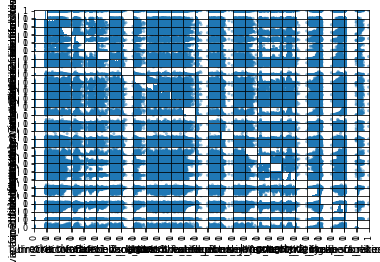

In [ ]:
pd.plotting.scatter_matrix(data)

In [ ]:
from sklearn import linear_model

In [ ]:
data2=data
training_data=data2.head(3533)

In [ ]:
test_data = data2.iloc[3534:]

In [ ]:
independent=allfeatures
independent.remove("gross")

In [ ]:
dependent=training_data[["gross"]]

In [ ]:
independent=training_data.loc[:, data.columns != 'name']


In [ ]:
regr = linear_model.LinearRegression()
regr.fit(independent, dependent)

LinearRegression()

In [ ]:
r2 = regr.score(independent, dependent)
print(r2)

1.0


In [ ]:
import statsmodels.api as sm
independent1 = sm.add_constant(independent)
result = sm.OLS(dependent, independent1).fit()
#print dir(result)
print(result.rsquared, result.rsquared_adj)

1.0 1.0
